In [1]:
import np as np

import Ramsey_ExperimentV3

import estimator
import numpy as np

In [ ]:
from tqdm import tqdm
import random

T = 1 * np.pi
uni_delay = np.linspace(0, T, 20)
shots = 1000
errors_fisher = []
errors_local = []
uniform_local = []
uniform_local_G = []
n = 1
delay = [1]
fisher_delay = [0.4439410861020235, 1.784695781691183]


decay_fit = []

repetitions = 1000
# W =]
Decay = np.arange(0.001,4, 0.25)
# np.delete(W, 0)
W = [1]
J = {}
J_list = [random.gauss(1, 0) for _ in range(n - 1)]

for rep in range(repetitions):
    rep_error_fisher = []
    rep_error_local = []
    rep_error_uniform = []
    rep_error_uniform_G = []

    rep_decay_fit = []
    for decay in tqdm(Decay, desc=f"Repetition {rep}"):
        batch_x_det, batch_y_det, batch_x_cross, batch_y_cross = Ramsey_ExperimentV3.ramsey_local(n, shots, delay,
                                                                                                  [decay],
                                                                                                  W, J)

        batch_det, batch_cross = Ramsey_ExperimentV3.ramsey_local_X(n, shots, fisher_delay, [decay], W, J)
        # batch_uni_det, batch_uni_cross = Ramsey_ExperimentV3.ramsey_local_X(n, shots, uni_delay, [decay], W, J)

        batch_x_det_uni,batch_y_det_uni, batch_x_cross_uni, batch_y_cross_uni = Ramsey_ExperimentV3.ramsey_local(n, shots, uni_delay, [decay], W, J)

        # batch_x_det_uni_G,batch_y_det_uni_G, batch_x_cross_uni_G, batch_y_cross_uni_G = Ramsey_ExperimentV3.ramsey_local_gausian(n, shots,0.7*delay[0],delay[0], uni_delay, [decay], W, J)

        Decay_local, W_local, J_local = estimator.one_by_one_fit(batch_x_det, batch_y_det, batch_x_cross,
                                                                 batch_y_cross)
        Decay_fisher, W_fisher, J_fisher = estimator.one_by_one_X(batch_det, batch_cross)

        # Decay_uni, W_uni, J_uni = estimator.one_by_one_X(batch_uni_det, batch_uni_cross)
        Decay_uni, W_uni, J_uni = estimator.one_by_one_fit(batch_x_det_uni,batch_y_det_uni, batch_x_cross_uni, batch_y_cross_uni)
        # Decay_uni_G, W_uni_G, J_uni_G = estimator.one_by_one_fit(batch_x_det_uni_G,batch_y_det_uni_G, batch_x_cross_uni_G, batch_y_cross_uni_G)

        rep_decay_fit.append(Decay_fisher)

        fisher_errors = estimator.percent_error(np.concatenate([W, [decay], J_list]),
                                                        np.concatenate([W_fisher,Decay_fisher, J_fisher]))

        local_errors = estimator.percent_error(np.concatenate([W,[decay], J_list]),
                                                       np.concatenate([W_local,Decay_local, J_local]))
        uniform_errors = estimator.percent_error(np.concatenate([W,[decay], J_list]),
                                                         np.concatenate([W_uni,Decay_uni, J_uni]))

        rep_error_fisher.append(fisher_errors)
        rep_error_local.append(local_errors)
        rep_error_uniform.append(uniform_errors)
        # rep_error_uniform_G.append(estimator.percent_error(np.concatenate([W,[decay], J_list]),

    decay_fit.append(rep_decay_fit)

    errors_fisher.append(rep_error_fisher)
    errors_local.append(rep_error_local)
    uniform_local.append(rep_error_uniform)
    # uniform_local_G.append(rep_error_uniform_G)


Repetition 0:   0%|          | 0/16 [00:00<?, ?it/s]C:\Projects\Crosstalk\estimator.py:36: OptimizeWarning: Covariance of the parameters could not be estimated
  params, params_covariance, *c = curve_fit(model_func, t_points, z_points, p0=initial_guess, bounds=bounds)
C:\Projects\Crosstalk\estimator.py:66: OptimizeWarning: Covariance of the parameters could not be estimated
  params, params_covariance, *c = curve_fit(model_func, t_points, z_points, p0=initial_guess, bounds=bounds)
Repetition 999: 100%|██████████| 16/16 [00:01<00:00,  8.94it/s]


In [4]:
k = 33
params = [[d, W[0]] for d in Decay]

errors_fisher_reshaped = np.array(errors_fisher).transpose()
errors_local_reshaped = np.array(errors_local).transpose()
errors_uniform_reshaped = np.array(uniform_local).transpose()

# errors_local_reshaped = list(map(list, zip(*errors_local)))
# errors_uniform_reshaped = list(map(list, zip(*uniform_local)))
# errors_fisher_reshaped_G = list(map(list, zip(*uniform_local_G)))

errors_fisher_reshaped_a = errors_fisher_reshaped[1]
errors_local_reshaped_a = errors_local_reshaped[1]
errors_uniform_reshaped_a = errors_uniform_reshaped[1]

errors_fisher_reshaped_w = errors_fisher_reshaped[0]
errors_local_reshaped_w = errors_local_reshaped[0]
errors_uniform_reshaped_w = errors_uniform_reshaped[0]


errors_fisher_median_a, errors_fisher_std_a = estimator.mean_of_medians(errors_fisher_reshaped_a, k, params)
errors_local_median_a,errors_local_std_a  = estimator.mean_of_medians(errors_local_reshaped_a, k, params)
errors_uniform_median_a, errors_uniform_std_a = estimator.mean_of_medians(errors_uniform_reshaped_a, k, params)

errors_fisher_median_w, errors_fisher_std_w = estimator.mean_of_medians(errors_fisher_reshaped_w, k, params)
errors_local_median_w,errors_local_std_w  = estimator.mean_of_medians(errors_local_reshaped_w, k, params)
errors_uniform_median_w, errors_uniform_std_w = estimator.mean_of_medians(errors_uniform_reshaped_w, k, params)

# errors_uniform_median_G, errors_uniform_std_G = estimator.mean_of_medians(errors_fisher_reshaped_G, k)

C:\Users\user\AppData\Local\Temp\ipykernel_3588\3913904033.py:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


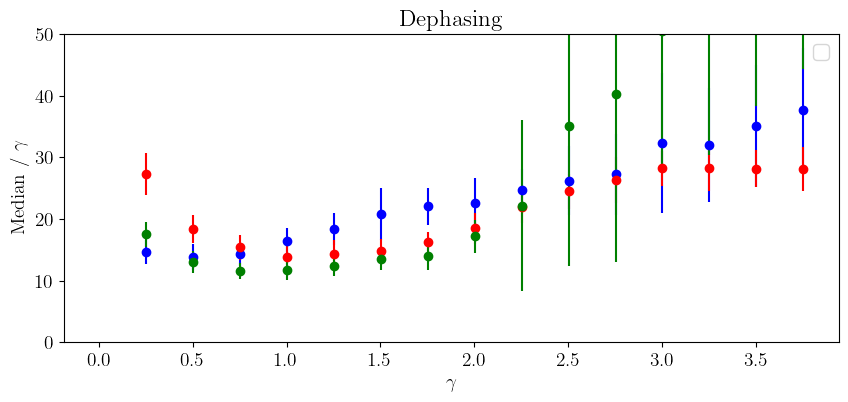

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))  # Adjust the figure size to make the plot longer
plt.rcParams['text.usetex'] = True
font = {'family': 'normal',
        'weight': 'bold',
        'size': 14}

plt.rc('font', **font)


plt.errorbar(Decay, 100 * np.array(errors_uniform_median_a), yerr=100 * np.array(errors_uniform_std_a),
             fmt='o', color='blue')
plt.errorbar(Decay, 100 * np.array(errors_fisher_median_a), yerr=100 * np.array(errors_fisher_std_a),
             fmt='o', color='red')
plt.errorbar(Decay, 100 * np.array(errors_local_median_a), yerr=100 * np.array(errors_local_std_a), fmt='o',
             color='green')
# plt.errorbar(Decay, 100 * np.array(errors_uniform_median_G/Decay ), yerr=100 * np.array(errors_uniform_std_G/Decay ), fmt='o',
#              color='magenta')
# Scatter points for 75th percentiles


plt.title("Dephasing")
# plt.title(f'Shots={Decay} ')
plt.xlabel('$\gamma$')
plt.ylabel('Median / $\gamma$')
plt.grid()
# plt.yscale('log')
# plt.xscale('log')
# plt.xlim([0, 2])
plt.ylim([0,50])
plt.grid()
plt.legend()

C:\Users\user\AppData\Local\Temp\ipykernel_3588\929407153.py:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


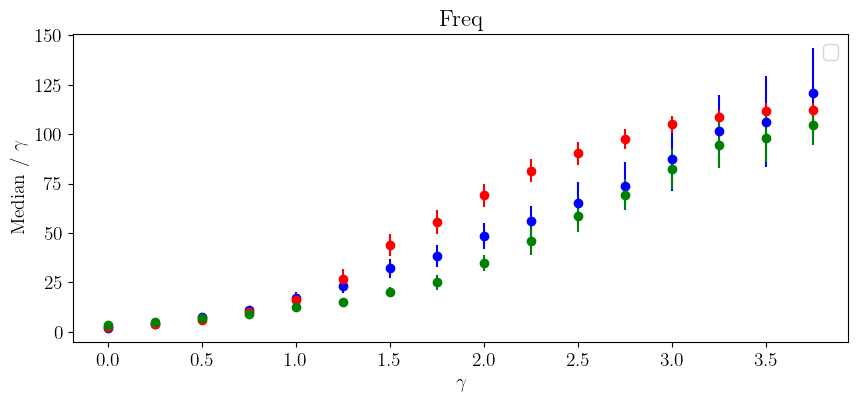

In [9]:
  import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))  # Adjust the figure size to make the plot longer
plt.rcParams['text.usetex'] = True
font = {'family': 'normal',
        'weight': 'bold',
        'size': 14}

plt.rc('font', **font)

plt.errorbar(Decay, 100 * np.array(errors_uniform_median_w), yerr=100 * np.array(errors_uniform_std_w),
             fmt='o', color='blue')
plt.errorbar(Decay, 100 * np.array(errors_fisher_median_w), yerr=100 * np.array(errors_fisher_std_w),
             fmt='o', color='red')
plt.errorbar(Decay, 100 * np.array(errors_local_median_w), yerr=100 * np.array(errors_local_std_w), fmt='o',
             color='green')
# plt.errorbar(Decay, 100 * np.array(errors_uniform_median_G/Decay ), yerr=100 * np.array(errors_uniform_std_G/Decay ), fmt='o',
#              color='magenta')
# Scatter points for 75th percentiles
plt.title("Freq")


# plt.title(f'Shots={Decay} ')
plt.xlabel('$\gamma$')
plt.ylabel('Median / $\gamma$')
plt.grid()
# plt.yscale('log')
# plt.xscale('log')
# plt.xlim([0, 2])
# plt.ylim([0,50])
plt.grid()

plt.legend()

mean:  0.20371041706892293
IQR:  0.0
std:  0.0


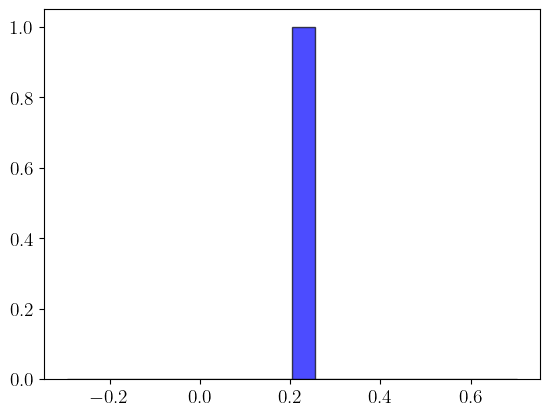

In [60]:
# index = 9
X = np.array(errors_fisher_median_w)[5]
# print("Decay: ",Decay[index])

#plot histogram with 10 bins
plt.hist(X, bins=20, color='blue', edgecolor='black', alpha=0.7)
q75, q25 = np.percentile(X, [75, 25])
iqr = q75 - q25
print("mean: ",np.median(X))
print("IQR: ", iqr)
print("std: ", np.std(X))

In [10]:
import pandas as pd

results_df = pd.DataFrame({
    "shots": shots,
    "Decay": Decay,
    "errors_fisher_median_w": errors_fisher_median_w,
    "errors_fisher_std_w": errors_fisher_std_w,
    "errors_local_median_w": errors_local_median_w,
    "errors_local_std_w": errors_local_std_w,
    "errors_uniform_median_w": errors_uniform_median_w,
    "errors_uniform_std_w": errors_uniform_std_w,
})

# Saving to Excel
results_df.to_excel('C:\Projects\Crosstalk\data_for_paper/stability-Decay_w.xlsx', index=False)

results_df = pd.DataFrame({
    "shots": shots,
    "Decay": Decay,
    "errors_fisher_median_a": errors_fisher_median_a,
    "errors_fisher_std_a": errors_fisher_std_a,
    "errors_local_median_a": errors_local_median_a,
    "errors_local_std_a": errors_local_std_a,
    "errors_uniform_median_a": errors_uniform_median_a,
    "errors_uniform_std_a": errors_uniform_std_a,
})

# Saving to Excel
results_df.to_excel('C:\Projects\Crosstalk\data_for_paper/stability-Decay_a.xlsx', index=False)

In [78]:
from tqdm import tqdm
import random

T = 1 * np.pi
shots = 1000
errors_fisher = []
errors_local = []
uniform_local = []
uniform_local_G = []
n = 1
delay = [1]
fisher_delay = [0.4439410861020235, 1.784695781691183]


decay_fit = []
omega_fit = []
repetitions = 100
# W =]
Decay = np.arange(0.001,4, 0.25)
# np.delete(W, 0)
W = [1]
J = {}
J_list = [random.gauss(1, 0) for _ in range(n - 1)]

for rep in range(repetitions):
    rep_Decay_fisher = []
    rep_omega_fisher = []

    rep_decay_fit = []
    for decay in tqdm(Decay, desc=f"Repetition {rep}"):

        batch_det, batch_cross = Ramsey_ExperimentV3.ramsey_local_X(n, shots, fisher_delay, [decay], W, J)
        Decay_fisher, W_fisher, J_fisher = estimator.one_by_one_X(batch_det, batch_cross)

        rep_Decay_fisher.append(Decay_fisher)
        rep_omega_fisher.append(W_fisher)
    decay_fit.append(rep_Decay_fisher)
    omega_fit.append(rep_omega_fisher)


Repetition 0:   0%|          | 0/16 [00:00<?, ?it/s]C:\Projects\Crosstalk\estimator.py:66: OptimizeWarning: Covariance of the parameters could not be estimated
  params, params_covariance, *c = curve_fit(model_func, t_points, z_points, p0=initial_guess, bounds=bounds)
Repetition 99: 100%|██████████| 16/16 [00:00<00:00, 68.66it/s]


In [79]:
decay_fit_t = np.array(decay_fit).transpose()[0]
decay_fit_t_mean = [np.mean(decay_fit_t[i]) for i in range(len(Decay))]
decay_fit_t_std = [np.std(decay_fit_t[i]) for i in range(len(Decay))]

omega_fit_t = np.array(omega_fit).transpose()[0]
omega_fit_t_mean = [np.mean(omega_fit_t[i]) for i in range(len(Decay))]
omega_fit_t_std = [np.std(omega_fit_t[i]) for i in range(len(Decay))]

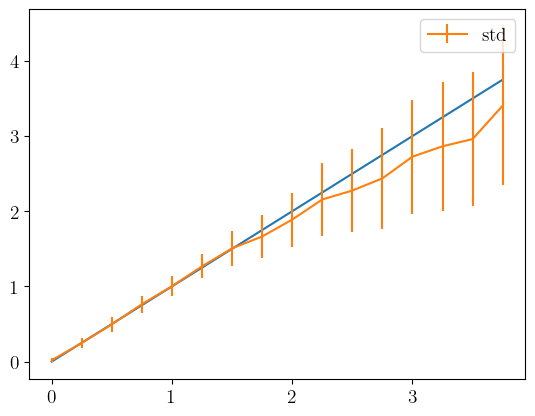

In [80]:
# plt.plot(Decay,decay_fit_t_mean,label='fit')
plt.plot(Decay,Decay)
plt.errorbar(Decay,decay_fit_t_mean,yerr=decay_fit_t_std,label='std')
plt.legend()



<ErrorbarContainer object of 3 artists>

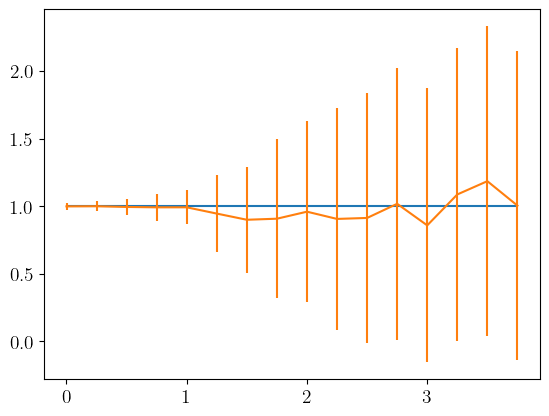

In [84]:
# plt.plot(Decay,omega_fit_t_mean,label='fit')
plt.plot(Decay,[1]*len(Decay))
plt.errorbar(Decay,omega_fit_t_mean,yerr=omega_fit_t_std,label='std')

In [74]:
from tqdm import tqdm
import random

T = 1 * np.pi
shots = 1000
errors_fisher = []
errors_local = []
uniform_local = []
uniform_local_G = []
n = 1
delay = [1]
fisher_delay = [0.4439410861020235, 1.784695781691183]


decay_fit = []

repetitions = 100
# W =]
Decay = np.arange(0.001,4, 0.25)
# np.delete(W, 0)
W = [1]
J = {}
J_list = [random.gauss(1, 0) for _ in range(n - 1)]

for rep in range(repetitions):
    rep_Decay_fisher = []

    rep_decay_fit = []
    for decay in tqdm(Decay, desc=f"Repetition {rep}"):
        batch_x_det, batch_y_det, batch_x_cross, batch_y_cross = Ramsey_ExperimentV3.ramsey_local(n, shots, delay,
                                                                                                  [decay],
                                                                                                  W, J)
        Decay_local, W_local, J_local = estimator.one_by_one_fit(batch_x_det, batch_y_det, batch_x_cross,
                                                                 batch_y_cross)
        # batch_det, batch_cross = Ramsey_ExperimentV3.ramsey_local_X(n, shots, fisher_delay, [decay], W, J)
        # Decay_fisher, W_fisher, J_fisher = estimator.one_by_one_X(batch_det, batch_cross)

        rep_Decay_fisher.append(Decay_local)
    decay_fit.append(rep_Decay_fisher)



Repetition 0:   0%|          | 0/16 [00:00<?, ?it/s]C:\Projects\Crosstalk\estimator.py:36: OptimizeWarning: Covariance of the parameters could not be estimated
  params, params_covariance, *c = curve_fit(model_func, t_points, z_points, p0=initial_guess, bounds=bounds)
Repetition 99: 100%|██████████| 16/16 [00:00<00:00, 63.98it/s]


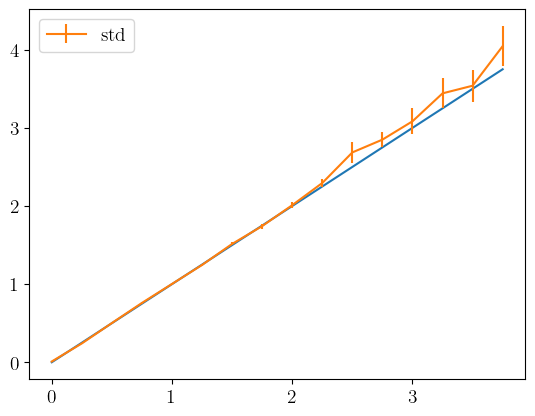

In [77]:
decay_fit_t = np.array(decay_fit).transpose()[0]
decay_fit_t_mean = [np.mean(decay_fit_t[i]) for i in range(len(Decay))]
decay_fit_t_std = [np.std(decay_fit_t[i])/ np.sqrt(repetitions) for i in range(len(Decay)) ]

# plt.plot(Decay,decay_fit_t_mean,label='fit')
plt.plot(Decay,Decay)
plt.errorbar(Decay,decay_fit_t_mean,yerr=decay_fit_t_std,label='std')
plt.legend()